In [5]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Default dimensions 
img_width, img_height = 224, 224 
 
#Create a bottleneck file
top_model_weights_path = "drive/MyDrive/Colab Notebooks/bottleneck_fc_model.h5"
# loading up our datasets
train_data_dir = 'drive/MyDrive/Colab Notebooks/train1_agreed/'
validation_data_dir = 'drive/MyDrive/Colab Notebooks/val1_agreed/'
 
# number of epochs to train top model 
epochs = 10 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 50 

In [7]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

In [5]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save("bottleneck_features_train.npy", bottleneck_features_train)

with open(output_file_name, 'wb') as handle:
  pickle.dump(bottleneck_features_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
end= datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)

In [9]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/train1_agreed.npy', 'rb') as handle:
        bottleneck_features_train = pickle.load(handle)
np.save('bottleneck_features_train.npy', bottleneck_features_train) 

In [10]:
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 9601 images belonging to 2 classes.


In [11]:
with open('/content/drive/MyDrive/Colab Notebooks/val1_agreed.npy', 'rb') as handle:
        bottleneck_features_validation = pickle.load(handle)
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 

In [12]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 1573 images belonging to 2 classes.


In [13]:
with open('/content/drive/MyDrive/Colab Notebooks/test1_agreed.npy', 'rb') as handle:
        bottleneck_features_test = pickle.load(handle)
np.save('bottleneck_features_test.npy', bottleneck_features_test) 

In [14]:
#test data
test_data_dir='/content/drive/MyDrive/Colab Notebooks/test1_agreed'
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 1534 images belonging to 2 classes.


In [15]:
import numpy as np
np.random.seed(1337)  # for reproducibility

import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import sys
from sklearn import preprocessing
import re
from collections import Counter
import random
random.seed(1337)
import tensorflow as tf
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
#print(stop_words)

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if (token not in stop_words and (len(token)!=1) and token not in ["rt","RT"]):
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
        #The join() method takes all items in an iterable and joins them into one string.
  return " ".join(tokens)

In [17]:
df_train = pd.read_csv('drive/MyDrive/Colab Notebooks/task_informative_text_img_agreed_lab_train.tsv',sep='\t')
#df_train= df_train.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)
df_train.shape

(9601, 9)

In [18]:
df1=df_train[df_train['label']=='informative']
df1.shape

(6345, 9)

In [19]:
df2=df_train[df_train['label']=='not_informative']
df2.shape

(3256, 9)

In [20]:
df=pd.concat([df1,df2])
df.shape

(9601, 9)

In [ ]:
df.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image
0,california_wildfires,917791291823591425,917791291823591425_0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive
1,california_wildfires,917793137925459968,917793137925459968_0,RT @KAKEnews: California wildfires destroy mor...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive
2,california_wildfires,917793137925459968,917793137925459968_1,RT @KAKEnews: California wildfires destroy mor...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive
3,california_wildfires,917793137925459968,917793137925459968_2,RT @KAKEnews: California wildfires destroy mor...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive
4,california_wildfires,917815040962695168,917815040962695168_0,RT @TheAtlantic: Photos of California's destru...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive


In [21]:
df.tweet_text = df.tweet_text.apply(preprocess)

In [69]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df.tweet_text)    #creates word_index dictionary based on frequency of the word

vocabularysize = len(tokenizer.word_index) + 1
print("Total words", vocabularysize)
xtrain_sequences = tokenizer.texts_to_sequences(df.tweet_text)

Total words 14910


In [70]:
xtrain_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xtrain_sequences, padding="post", maxlen=25)

In [71]:
xtrain_padded_sequences.shape

(9601, 25)

In [72]:
train_data.shape

(9601, 7, 7, 512)

In [ ]:
train_labels.shape

(9601, 2)

In [ ]:
bottleneck_features_validation.shape

(3107, 7, 7, 512)

In [22]:
df_val = pd.read_csv("drive/MyDrive/Colab Notebooks/task_informative_text_img_agreed_lab_dev.tsv", sep='\t')
df_test = pd.read_csv("drive/MyDrive/Colab Notebooks/task_informative_text_img_agreed_lab_test.tsv", sep='\t')

In [23]:
df3=df_val[df_val['label']=='informative']
df4=df_val[df_val['label']=='not_informative']
df_valid=pd.concat([df3,df4])

In [24]:
df5=df_test[df_test['label']=='informative']
df6=df_test[df_test['label']=='not_informative']
df_test=pd.concat([df5,df6])

In [76]:
df_valid.shape

(1573, 9)

In [25]:
df_valid.tweet_text = df_valid.tweet_text.apply(preprocess)

In [26]:
df_test.tweet_text = df_test.tweet_text.apply(preprocess)

In [79]:
xval_sequences = tokenizer.texts_to_sequences(df_valid.tweet_text)
xtest_sequences = tokenizer.texts_to_sequences(df_test.tweet_text)

In [80]:
xval_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xval_sequences, padding="post", maxlen=25)
xtest_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xtest_sequences, padding="post", maxlen=25)

In [81]:
xval_padded_sequences.shape

(1573, 25)

In [82]:
#Train Embeddings
import pandas as pd
df_train = pd.read_csv('drive/MyDrive/Colab Notebooks/task_informative_text_img_agreed_lab_train.tsv',sep='\t')
df_train = df_train.drop_duplicates(subset="tweet_id")
df_train= df_train.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)
df_train = df_train.dropna()
df_train.tweet_text = df_train.tweet_text.apply(preprocess)
documents = [_text.split() for _text in df_train.tweet_text]

In [83]:
import multiprocessing
import gensim
EMBEDDINGLENGTH=300
w2v_model = gensim.models.Word2Vec(size=EMBEDDINGLENGTH, 
                                   window=2, 
                                   min_count=1,
                                   sg=1)

In [84]:
w2v_model.save("w2v_model.model")
w2v_model.build_vocab(documents)
wordvectors = w2v_model.wv    #keyed vector object
#print("Vocab size:", len(wordvectors))

In [85]:
w2v_model.train(documents, total_examples=len(documents), epochs=50)

(3098444, 3544150)

In [86]:
vocabularysize=14910
embedding_matrix = np.zeros((vocabularysize, EMBEDDINGLENGTH))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)


(14910, 300)


In [87]:
train_data.shape[1:]

(7, 7, 512)

In [39]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
import warnings
import datetime
import optparse
import os, errno
import keras.callbacks as callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, CSVLogger, TensorBoard
from gensim.models import KeyedVectors
from keras.layers import Input, Activation, Add, Concatenate, Dropout
from keras.models import load_model
from keras.layers import concatenate
from time import time
import pickle
from keras.layers.normalization import BatchNormalization
import keras
from keras.applications.resnet50 import ResNet50

In [90]:
def create_Bilstm():
    
    embedding_layer = tf.keras.layers.Embedding(input_dim=vocabularysize,
                                            output_dim=EMBEDDINGLENGTH,
                                            weights=[embedding_matrix],
                                            input_length=25,
                                            trainable=False)
    model = Sequential()
    model.add(embedding_layer)
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
    model.add(Dense(10,activation="relu"))
    return model

In [91]:
def create_cnn():
    
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    model = Sequential() 
    model.add(Flatten(input_shape=train_data.shape[1:])) 
    model.add(Dense(10, activation=keras.layers.LeakyReLU(alpha=0.3))) 
 
    # Return the CNN
    return model        

In [92]:
bilstm = create_Bilstm()
cnn = create_cnn()
combinedInput = concatenate([bilstm.output, cnn.output])

In [93]:
# The final fully-connected layer 
x = Dense(4, activation="relu")(combinedInput)
x = Dense(2, activation="softmax")(x)

In [94]:
# The final model accepts numerical data on the bilstm input and images on the CNN input, outputting a single value
model1 = Model(inputs=[bilstm.input, cnn.input], outputs=x)

In [95]:
from keras.optimizers import Adam, RMSprop
start = datetime.datetime.now()

# compile the model 
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model1.compile(loss="categorical_crossentropy", metrics=['acc'], optimizer=opt)
 
# train the model
history = model1.fit([xtrain_padded_sequences, train_data], train_labels, validation_data=([xval_padded_sequences, validation_data], validation_labels), epochs=5, batch_size=50)
 
end = datetime.datetime.now()
print("Time taken to run:", end-start)

Epoch 1/5
193/193 [==============================] - 58s 267ms/step - loss: 0.4750 - acc: 0.7890 - val_loss: 0.3714 - val_acc: 0.8760
Epoch 2/5
193/193 [==============================] - 50s 258ms/step - loss: 0.3588 - acc: 0.8775 - val_loss: 0.3041 - val_acc: 0.8735
Epoch 3/5
193/193 [==============================] - 50s 260ms/step - loss: 0.2567 - acc: 0.8915 - val_loss: 0.3151 - val_acc: 0.8652
Epoch 4/5
193/193 [==============================] - 50s 259ms/step - loss: 0.1878 - acc: 0.9221 - val_loss: 0.3079 - val_acc: 0.8748
Epoch 5/5
193/193 [==============================] - 50s 260ms/step - loss: 0.1633 - acc: 0.9300 - val_loss: 0.4769 - val_acc: 0.8322
Time taken to run: 0:04:18.031591


In [ ]:
model1.save_weights('merge_binary_first.h5')

In [96]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [99]:
def cnn_evaluation(model, history,test_features, test_images, test_labels, class_names=None, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('loss')  
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    
    results_test = model.evaluate([test_features, test_images], test_labels)
    print('Test Loss:', results_test[0])
    print('Test Accuracy:', results_test[1])
    
    y_pred = np.round(model.predict([test_features, test_images]))
    
    target_names = ['Informative', 'Non-Informative']
    classification_metrics = metrics.classification_report(test_labels, y_pred, target_names=target_names,digits=4)
    print(classification_metrics)
    categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
    categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
    cm= confusion_matrix(categorical_test_labels, categorical_preds)
    plot_confusion_matrix(cm, target_names)

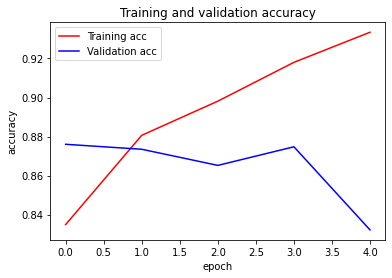

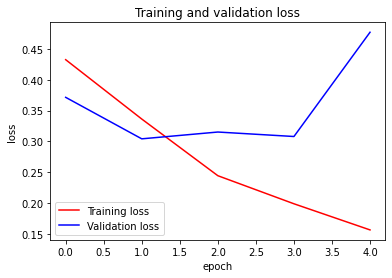

48/48 [==============================] - 3s 56ms/step - loss: 0.4634 - acc: 0.8403
Test Loss: 0.46343284845352173
Test Accuracy: 0.8402868509292603
                 precision    recall  f1-score   support

    Informative     0.8132    0.9893    0.8927      1030
Non-Informative     0.9609    0.5357    0.6879       504

      micro avg     0.8403    0.8403    0.8403      1534
      macro avg     0.8871    0.7625    0.7903      1534
   weighted avg     0.8617    0.8403    0.8254      1534
    samples avg     0.8403    0.8403    0.8403      1534

Confusion matrix, without normalization


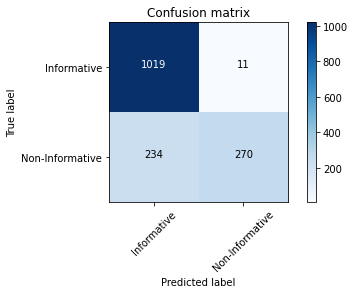

In [100]:
cnn_evaluation(model1, history, xtest_padded_sequences, test_data,test_labels, class_names=None, model_name=None)

In [ ]:
model.save_weights("drive/MyDrive/Colab Notebooks/binary.h5")

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import tensorflow_hub
import os


import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report


import re
import gensim
import seaborn
import random
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
!pip install bert-for-tf2
import bert
from bert.tokenization.bert_tokenization import FullTokenizer
import tensorflow_hub
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = tensorflow_hub.KerasLayer(module_url, trainable=True)

In [30]:
df_train = pd.read_csv('drive/MyDrive/Colab Notebooks/task_informative_text_img_agreed_lab_train.tsv',sep='\t')
df_val = pd.read_csv("drive/MyDrive/Colab Notebooks/task_informative_text_img_agreed_lab_dev.tsv", sep='\t')
df_test = pd.read_csv("drive/MyDrive/Colab Notebooks/task_informative_text_img_agreed_lab_test.tsv", sep='\t')

In [31]:
df1=df_train[df_train['label']=='informative']
df2=df_train[df_train['label']=='not_informative']
df_train=pd.concat([df1,df2])
df_train.shape

(9601, 9)

In [32]:
df3=df_val[df_val['label']=='informative']
df4=df_val[df_val['label']=='not_informative']
df_val=pd.concat([df3,df4])

In [33]:
df5=df_test[df_test['label']=='informative']
df6=df_test[df_test['label']=='not_informative']
df_test=pd.concat([df5,df6])

In [34]:
df_train.columns

Index(['event_name', 'tweet_id', 'image_id', 'tweet_text', 'image', 'label',
       'label_text', 'label_image', 'label_text_image'],
      dtype='object')

In [35]:
df_train= df_train.drop(['tweet_id', 'image_id','image', 'label_text','label_image'], axis=1)
df_val= df_val.drop(['tweet_id', 'image_id','image', 'label_text','label_image'], axis=1)
df_test= df_test.drop(['tweet_id', 'image_id','image', 'label_text','label_image'], axis=1)

In [36]:
def preprocess(text):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if (token not in stop_words and (len(token)!=1) and token not in ["rt","RT"]):
        tokens.append(token)
        #The join() method takes all items in an iterable and joins them into one string.
  return " ".join(tokens)

In [37]:
df_train.tweet_text = df_train.tweet_text.apply(preprocess)
df_val.tweet_text = df_val.tweet_text.apply(preprocess)
df_test.tweet_text = df_test.tweet_text.apply(preprocess)

In [38]:
df_train.reset_index(inplace = True)
df_val.reset_index(inplace = True)
df_test.reset_index(inplace = True)

In [39]:
vocabularyfile = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocabularyfile, do_lower_case)

In [40]:
def embedding(string):
    string = tokenizer.tokenize(string)
            
    string = string[:maxstringlength-2]
    input_sequence = ["[CLS]"] + string + ["[SEP]"]
    pad_len = maxstringlength - len(input_sequence)

    tokens = tokenizer.convert_tokens_to_ids(input_sequence)
    tokens += [0] * pad_len
    pad_masks = [1] * len(input_sequence) + [0] * pad_len
    segment_ids = [0] * maxstringlength
    return tokens, pad_masks, segment_ids

In [41]:
def formatting(data):
    tokenlist = []
    masklist = []
    segmentlist = []
    for i in range(data.shape[0]):
        tokenlist.append(data[i][0])
        masklist.append(data[i][1])
        segmentlist.append(data[i][2])
    return np.array(tokenlist), np.array(masklist), np.array(segmentlist)

In [42]:
maxstringlength = 22
trainingdata = df_train.tweet_text.apply(embedding)
valdata = df_val.tweet_text.apply(embedding)

X_train = formatting(trainingdata)
X_val = formatting(valdata)

# Y_train = df_train.label_text.values
# Y_val = df_val.label_text.values

In [43]:
testdata=df_test.tweet_text.apply(embedding)
X_test=formatting(testdata)

In [44]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
import warnings
import datetime
import optparse
import os, errno
import keras.callbacks as callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, CSVLogger, TensorBoard
from gensim.models import KeyedVectors
from keras.layers import Input, Activation, Add, Concatenate, Dropout
from keras.models import load_model
from keras.layers import concatenate
from time import time
import pickle
from keras.layers.normalization import BatchNormalization
import keras
from keras.applications.resnet50 import ResNet50

In [52]:
def create_cnn():
   
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    model = Sequential() 
    model.add(Flatten(input_shape=train_data.shape[1:])) 
    model.add(Dense(10, activation=keras.layers.LeakyReLU(alpha=0.3))) 
 
    # Return the CNN
    return model        

In [51]:
def create_bert(bert_layer, noofcategories, maxstringlength=22):
    tokens = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="tokens")
    masks = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="masks")
    segments = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="segments")

    pooled_output, sequence_output = bert_layer([tokens, masks, segments])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.4)(net)
    out = tf.keras.layers.Dense(10, activation='relu')(net)
    
    model = tf.keras.models.Model(inputs=[tokens, masks, segments], outputs=out)
    #model.compile(tf.keras.optimizers.Adam(lr=2e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [53]:
bert_model = create_bert(bert_layer,2, maxstringlength=22)
cnn = create_cnn()
combinedInput = concatenate([bert_model.output, cnn.output])

In [54]:
# The final fully-connected layer 
x = Dense(4, activation="relu")(combinedInput)
x = Dense(2, activation="softmax")(x)

In [55]:
# The final model accepts numerical data on the bert input and images on the CNN input, outputting a single value
model1 = Model(inputs=[bert_model.input, cnn.input], outputs=x)

In [56]:
from keras.optimizers import Adam, RMSprop
start = datetime.datetime.now()

# compile the model 
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model1.compile(loss="categorical_crossentropy", metrics=['acc'], optimizer=opt)
 
# train the model
history = model1.fit([X_train, train_data], train_labels, validation_data=([X_val, validation_data], validation_labels), epochs=1, batch_size=8)
 
end = datetime.datetime.now()
print("Time taken to run:", end-start)

1201/1201 [==============================] - 11398s 9s/step - loss: 0.6665 - acc: 0.6548 - val_loss: 0.6340 - val_acc: 0.6713
Time taken to run: 3:09:58.548316
